1. <a href="#load"> Loading Data </a>
2. <a href="#prep"> Pre-processing </a>
3. <a href="#bmod"> Build Model </a>
4. <a href="#eval"> Evaluate Model </a>
5. <a href="#pred"> Predict </a>

In [ ]:
import os
import itertools
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Hide all TensorFlow debugging logs

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import densenet
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.constraints import max_norm
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# <a id="load">Loading Data</a>

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 classes

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


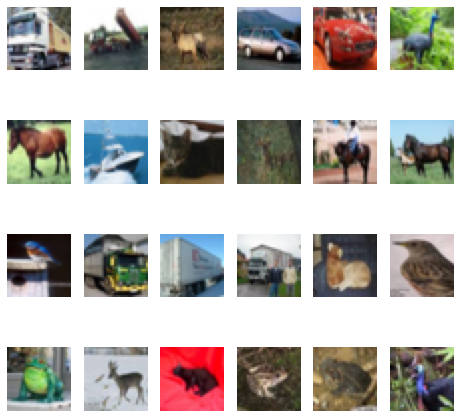

In [ ]:

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 4
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# <a id="prep"> Pre-processing </a>

In [ ]:
print(x_train.max())
print(x_test.max())

255
255


In [ ]:
x_train = x_train/225
x_test = x_test/255

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)

# <a id="bmod"> Build Model </a>

In [ ]:
model = Sequential()

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.8))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='softmax'))
model.add(keras.layers.Dense(10,activation='sigmoid'))


# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
adam = optimizers.Adam(lr=0.001)
#earlystopping = EarlyStopping(monitor ="val_accuracy",
#                              mode = 'auto', patience = 6,
#                              restore_best_weights = True)

model.compile(loss='categorical_crossentropy',
                     optimizer=adam,
                     metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x_train,
          y_cat_train,
          batch_size=64,
          epochs=30,
          validation_data=(x_test,y_cat_test),
          #callbacks=[early_stop]
          )

Epoch 1/30
782/782 [==============================] - 26s 18ms/step - loss: 1.9957 - accuracy: 0.3465 - val_loss: 1.8253 - val_accuracy: 0.3968
Epoch 2/30
782/782 [==============================] - 13s 17ms/step - loss: 1.6308 - accuracy: 0.4395 - val_loss: 1.5330 - val_accuracy: 0.4505
Epoch 3/30
782/782 [==============================] - 13s 17ms/step - loss: 1.4454 - accuracy: 0.4698 - val_loss: 1.4475 - val_accuracy: 0.4628
Epoch 4/30
782/782 [==============================] - 13s 16ms/step - loss: 1.3299 - accuracy: 0.4932 - val_loss: 1.3563 - val_accuracy: 0.4762
Epoch 5/30
782/782 [==============================] - 13s 16ms/step - loss: 1.2409 - accuracy: 0.5133 - val_loss: 1.3606 - val_accuracy: 0.4747
Epoch 6/30
782/782 [==============================] - 13s 16ms/step - loss: 1.1801 - accuracy: 0.5316 - val_loss: 1.3043 - val_accuracy: 0.4932
Epoch 7/30
782/782 [==============================] - 13s 16ms/step - loss: 1.1336 - accuracy: 0.5448 - val_loss: 1.2363 - val_accuracy:

In [ ]:
model.save("Updated_Cifar10_CNN_model.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

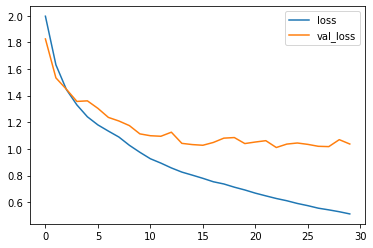

In [ ]:
losses[['loss','val_loss']].plot()

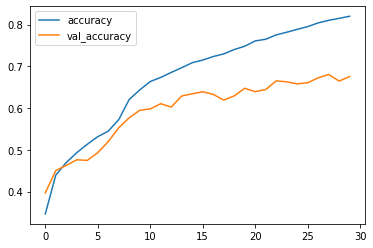

In [ ]:
losses[['accuracy','val_accuracy']].plot()

# <a id="eval"> Evaluate Model </a>

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0366092920303345, 0.675599992275238]


In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69      1000
           1       0.90      0.75      0.82      1000
           2       0.54      0.51      0.52      1000
           3       0.50      0.45      0.47      1000
           4       0.52      0.54      0.53      1000
           5       0.59      0.61      0.60      1000
           6       0.76      0.82      0.79      1000
           7       0.71      0.74      0.72      1000
           8       0.76      0.84      0.80      1000
           9       0.79      0.82      0.81      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[670,   6,  72,  29,  20,   5,   6,  22, 148,  22],
       [ 37, 751,   7,   8,   5,   4,  10,  10,  32, 136],
       [ 83,   3, 512,  62, 169,  63,  64,  22,  14,   8],
       [ 19,   6,  75, 451,  97, 221,  73,  35,  12,  11],
       [ 21,   2, 148,  49, 540,  28,  56, 145,   9,   2],
       [  8,   1,  65, 169,  61, 612,  23,  51,   7,   3],
       [  5,   0,  36,  59,  48,  19, 819,   6,   6,   2],
       [ 14,   2,  23,  40,  90,  71,  10, 742,   0,   8],
       [ 63,  17,   6,  26,   9,   2,  13,   3, 841,  20],
       [ 35,  47,  11,  17,   6,   5,   6,  13,  42, 818]])

# <a id="pred"> Predict </a>

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# https://www.cs.toronto.edu/~kriz/cifar.html

d = dict(zip(classes, class_names))

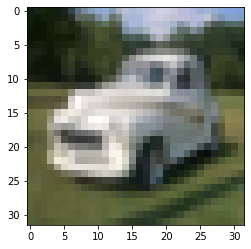

In [ ]:
my_image = x_test[1005]

plt.imshow(my_image)

In [ ]:
input_img = my_image.reshape(1,32,32,3)

predictions = np.argmax(model.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[1005][0]]} \n\nPredicted class: {d[predictions]}")

True class: automobile 

Predicted class: automobile
